#Introduction

This analysis investigates vehicle specifications and its suspected relations with levels of CO2 emissions. Understanding the key vehicle specifications that affect CO2 emissions can provide valuable insights into lowering levels of emissions for newly developed vehicle models.

In this notebook, we will explore various aspects of the dataset, focusing on key features such as engine size, transmission, and fuel type, etc., to examine their impact on CO2 emissions. Through descriptive and inferential statistical techniques, we will assess the relationships and differences between different vehicle specification types in terms of their CO2 emission levels.

#Data Loading and Overview

Firstly, import the major python packages needed for the analyses:

- Pandas
- NumPy
- Matplotlib
- Seaborn

We may need to import more specific statistical tools from SciPy on a need-based level later on.

In [69]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
#use pandas to read csv file

df = pd.read_csv('CO2 Emissions_Canada.csv')

#Basic Diagnostics

In [71]:
#first five rows

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [72]:
#general info about the dataset

df.info()

#seems to not have any null values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [73]:
#some statistics for the columns that are numerical features

df.describe()

#no red flags from intial screening

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


#Data Cleaning

In [74]:
#identify the number of null values in each column

df.isna().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


In [75]:
#some column names can be cleaned up
#the fuel type can be decoded using the dataset description csv

map = {'Z': 'Premium Gasoline', 'D': 'Diesel', 'X': 'Regular Gasoline', 'E': 'Ethanol (E85)', 'N': 'Natural Gas'}

df['Fuel Type']=df['Fuel Type'].map(map)

In [76]:
df['Fuel Type'].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol (E85)',
       'Natural Gas'], dtype=object)

In [77]:
#see the distribution
df['Fuel Type'].value_counts()

#might want to remove the one natural gas row of data

,count
Fuel Type,
Regular Gasoline,3637
Premium Gasoline,3202
Ethanol (E85),370
Diesel,175
Natural Gas,1


In [78]:
df[df['Fuel Type']=='Natural Gas']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS6,Natural Gas,15.2,9.5,12.7,22,213


In [79]:
#drop natural gas

df = df[df['Fuel Type'] != 'Natural Gas']

In [80]:
df['Fuel Type'].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol (E85)'],
      dtype=object)

In [81]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

In [82]:
#extract the number of gears in transmission

def extract_gears(transmission):
    import re #used chatGPT for assistance in portions of this part
    match = re.search(r'\d+', transmission)
    if match:
        return int(match.group(0))
    else:
        return None

df['Number of Gears'] = df['Transmission'].apply(extract_gears)

columns = list(df.columns)
columns.insert(6, columns.pop(columns.index('Number of Gears')))
df = df[columns]

In [83]:
df['Number of Gears'] = df['Number of Gears'].fillna('Unknown')

In [84]:
#check on the dataframe
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Number of Gears,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,5.0,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,6.0,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,7.0,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,6.0,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,6.0,Premium Gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,8.0,Premium Gasoline,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,8.0,Premium Gasoline,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232


In [85]:
#vehicle class column could get a little messy
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [86]:
#let's condense it into a column named 'Size' and have three sizes: Small, Medium, and Large

def categorize_size(vehicle_class):
    size_mapping = {
        'COMPACT': 'Small',
        'MINICOMPACT': 'Small',
        'SUBCOMPACT': 'Small',
        'TWO-SEATER': 'Small',
        'STATION WAGON - SMALL': 'Small',
        'PICKUP TRUCK - SMALL': 'Small',

        'MID-SIZE': 'Medium',
        'SUV - SMALL': 'Medium',
        'STATION WAGON - MID-SIZE': 'Medium',
        'PICKUP TRUCK - STANDARD': 'Medium',

        'FULL-SIZE': 'Large',
        'SUV - STANDARD': 'Large',
        'VAN - CARGO': 'Large',
        'VAN - PASSENGER': 'Large',
        'MINIVAN': 'Large',
        'SPECIAL PURPOSE VEHICLE': 'Large'
    }
    return size_mapping.get(vehicle_class, 'Unknown')

df['Size'] = df['Vehicle Class'].apply(categorize_size)

cols = list(df.columns)
vehicle_class_index = 3  # 4th column (0-indexed)
cols.insert(vehicle_class_index + 1, cols.pop(cols.index('Size')))

df=df[cols]

In [87]:
df

,Make,Model,Vehicle Class,Engine Size(L),Size,Cylinders,Transmission,Number of Gears,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,Small,4,AS5,5.0,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,Small,4,M6,6.0,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,Small,4,AV7,7.0,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,Medium,6,AS6,6.0,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,Medium,6,AS6,6.0,Premium Gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,Medium,4,AS8,8.0,Premium Gasoline,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,Medium,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,Medium,4,AS8,8.0,Premium Gasoline,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,Large,4,AS8,8.0,Premium Gasoline,11.2,8.3,9.9,29,232


The dataframe should now be ready for descriptive analyses!

#Descriptive Analyses

###What are the top 5 most common vehicle makes?

In [88]:
#put top 5 makes in a dataframe
top5 = df['Make'].value_counts().head(5)
top5

,count
Make,
FORD,628
CHEVROLET,587
BMW,527
MERCEDES-BENZ,419
PORSCHE,376


<ipython-input-89-9d25721a3a2c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Make', data=df[df['Make'].isin(top.index)], order=top.index, palette='Purples')


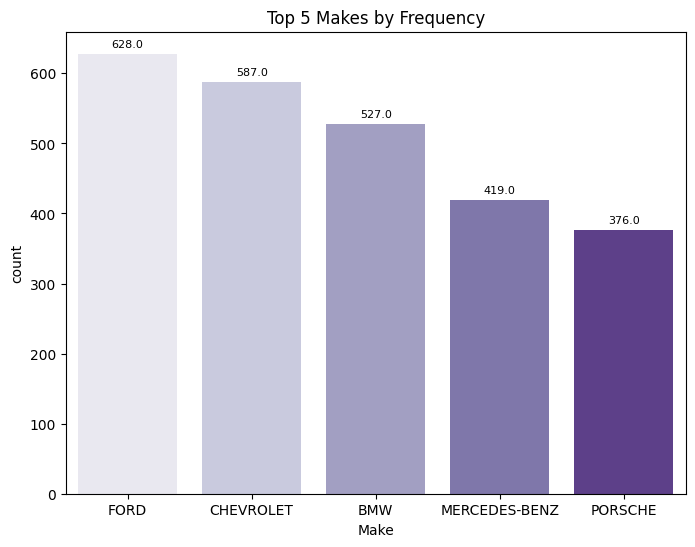

In [89]:
#functionalize creating a countplot with labels


def top_makes(number):
    top = df['Make'].value_counts().head(number)
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Make', data=df[df['Make'].isin(top.index)], order=top.index, palette='Purples')
    plt.title(f'Top {number} Makes by Frequency')


    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=8, color='black',
                xytext=(0, 7), textcoords='offset points')

top_makes(5)

###What are the C02 emissions of the top 5 makes?

<ipython-input-90-62f431b60047>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Make', y='CO2 Emissions(g/km)', data=df_top5, palette='Set2')


Text(0.5, 1.0, 'CO2 Emissions of Top 5 Makes')

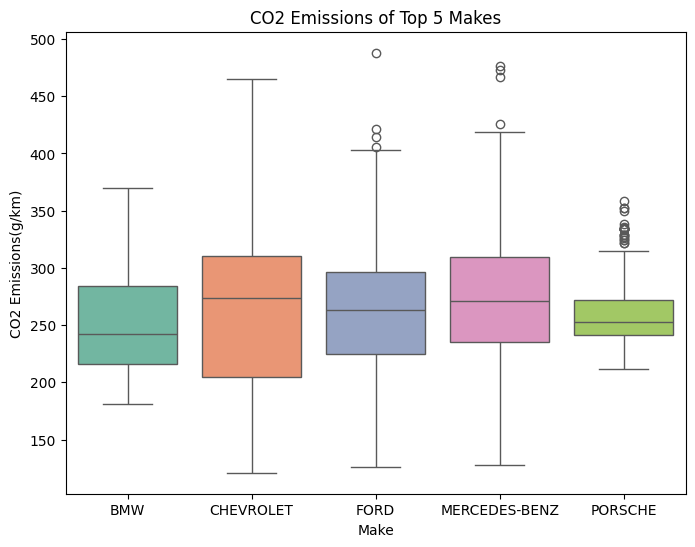

In [90]:
top5 = df['Make'].value_counts().head(5).index
df_top5 = df[df['Make'].isin(top5)]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Make', y='CO2 Emissions(g/km)', data=df_top5, palette='Set2')
plt.title('CO2 Emissions of Top 5 Makes')

###What are the lowest average CO2 emission makes?

In [91]:
average_emissions = df.groupby('Make')['CO2 Emissions(g/km)'].mean()
lowest_emissions = average_emissions.nsmallest(5)

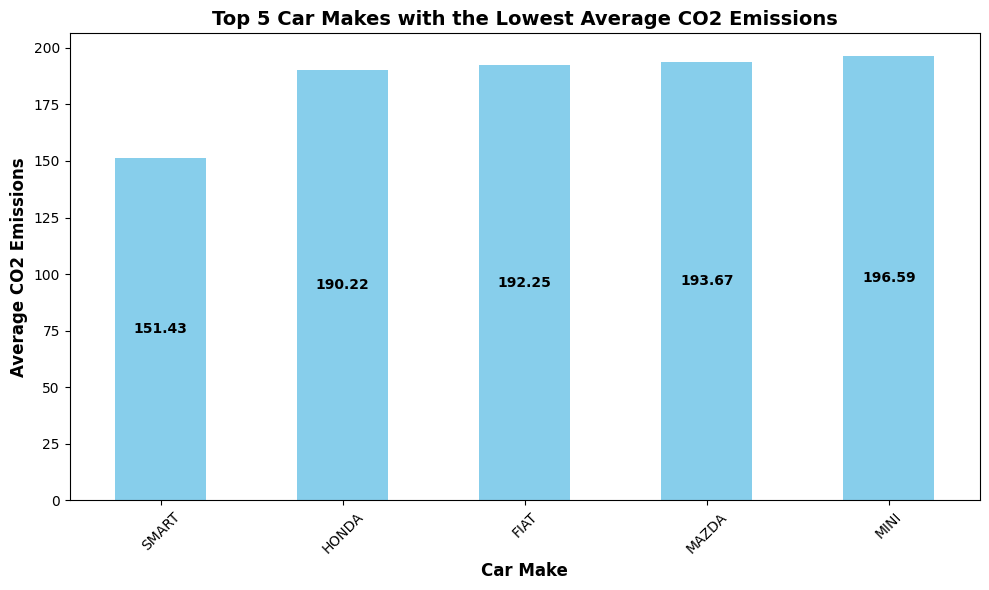

In [92]:
plt.figure(figsize=(10, 6))
ax = lowest_emissions.plot(kind='bar', color='skyblue')
for i, value in enumerate(lowest_emissions):
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', color='black', fontweight='bold')
plt.title('Top 5 Car Makes with the Lowest Average CO2 Emissions', fontweight='bold', size=14)
plt.xlabel('Car Make', size=12, fontweight='bold')
plt.ylabel('Average CO2 Emissions', size=12, fontweight='bold')
plt.xticks(rotation=45, size = 10)
plt.tight_layout()
plt.show()

SMART only has 7 rows of data, so we need to take them being the "lowest average CO2 emissions" make with a grain of salt. However, the other four have far more rows of data, specifically HONDA with 214 rows. There may be value in consulting HONDA about how they build their cars!

###How is CO2 emissions affected by certain features?

<ipython-input-140-fcf1d532e4c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y='CO2 Emissions(g/km)', data=df, palette='YlGnBu')


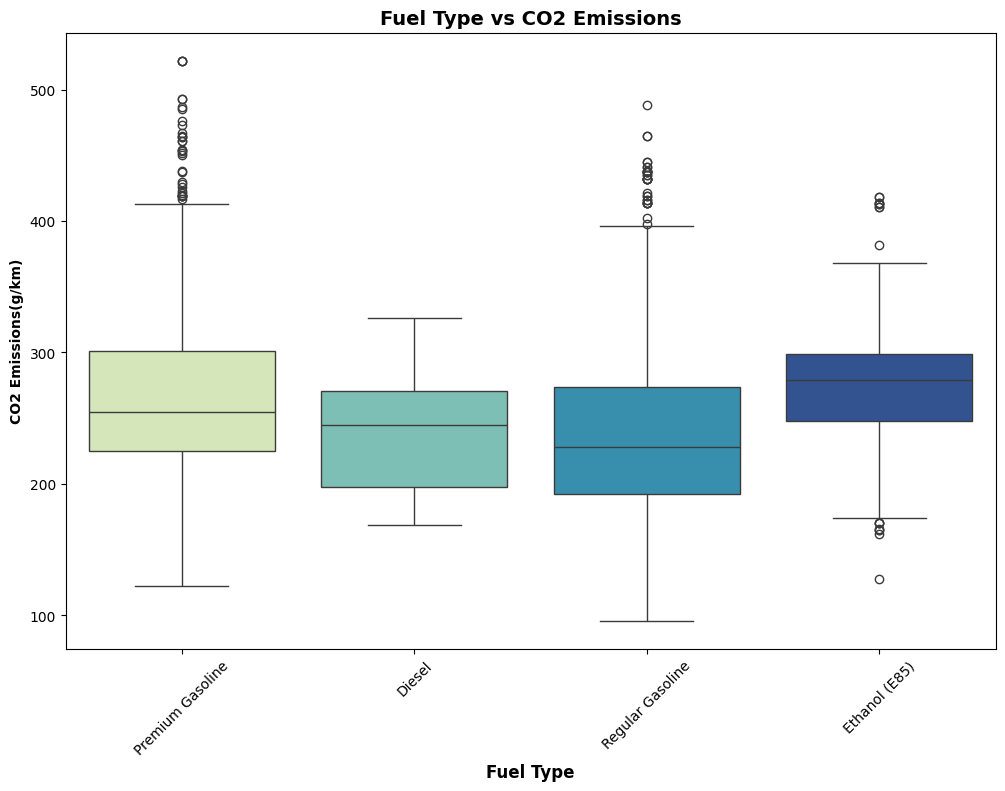

In [140]:
def co2_emissions(feature):

  plt.figure(figsize=(12, 8))
  ax = sns.boxplot(x=feature, y='CO2 Emissions(g/km)', data=df, palette='YlGnBu')
  plt.title(f'{feature} vs CO2 Emissions', fontweight='bold', size=14)
  plt.xticks(rotation=45, size=10)
  plt.xlabel(f'{feature}', fontweight='bold', size=12)
  plt.ylabel('CO2 Emissions(g/km)', fontweight='bold', size=10)

co2_emissions('Fuel Type')

<ipython-input-93-b6d6c553156e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y='CO2 Emissions(g/km)', data=df, palette='YlGnBu')


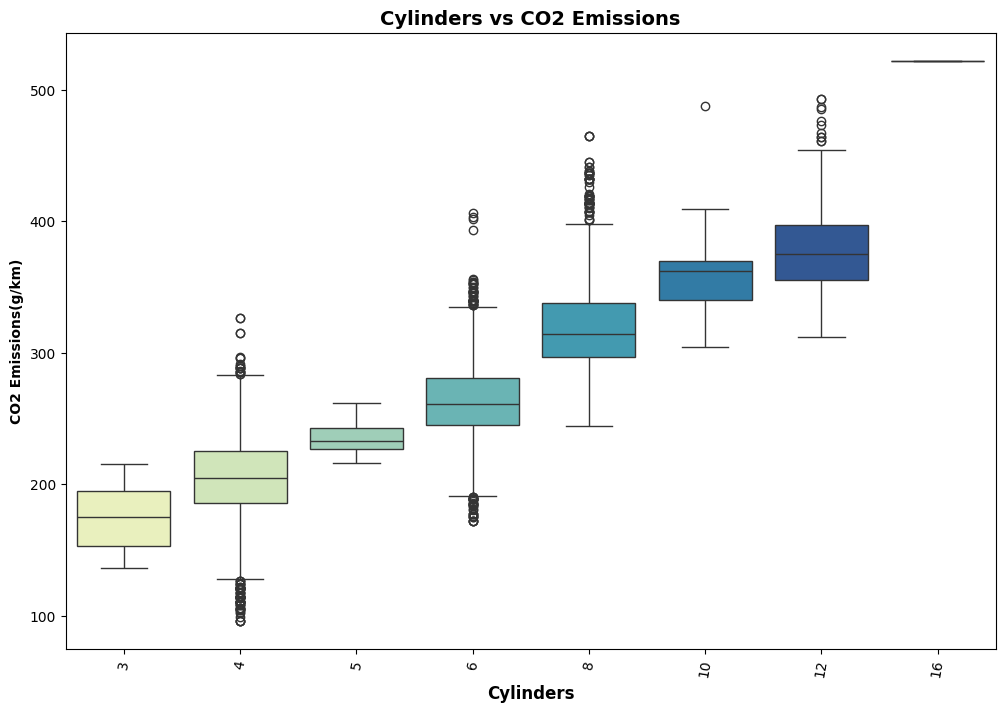

In [94]:
#now we can run any feature through the function

co2_emissions('Cylinders')

<ipython-input-93-b6d6c553156e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y='CO2 Emissions(g/km)', data=df, palette='YlGnBu')


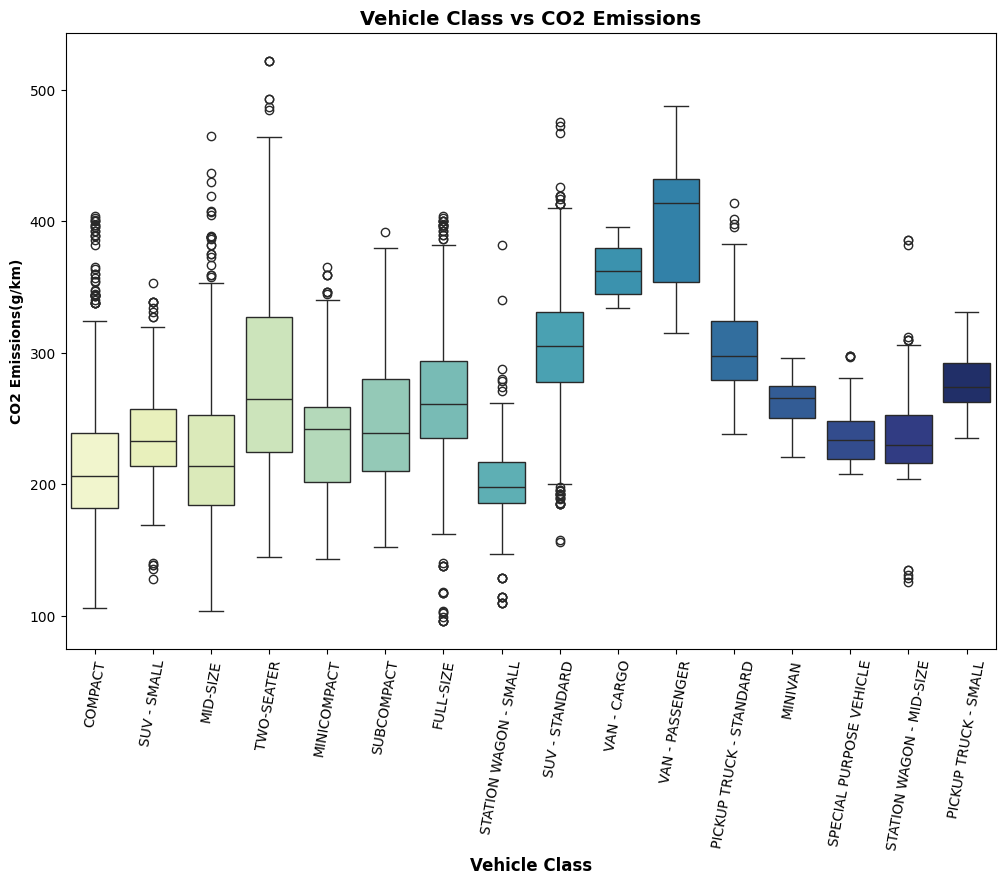

In [95]:
co2_emissions('Vehicle Class')

<ipython-input-93-b6d6c553156e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y='CO2 Emissions(g/km)', data=df, palette='YlGnBu')


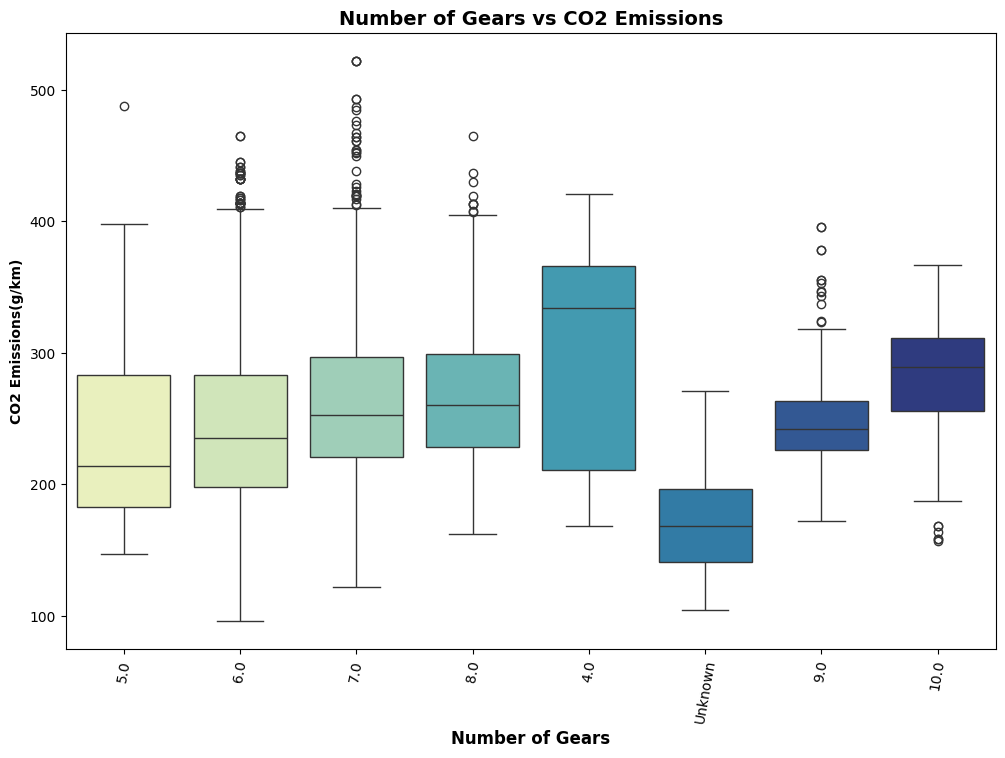

In [96]:
co2_emissions('Number of Gears')

<ipython-input-138-ad1538ef24e5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=feature, y='CO2 Emissions(g/km)', data=df, palette='Reds')


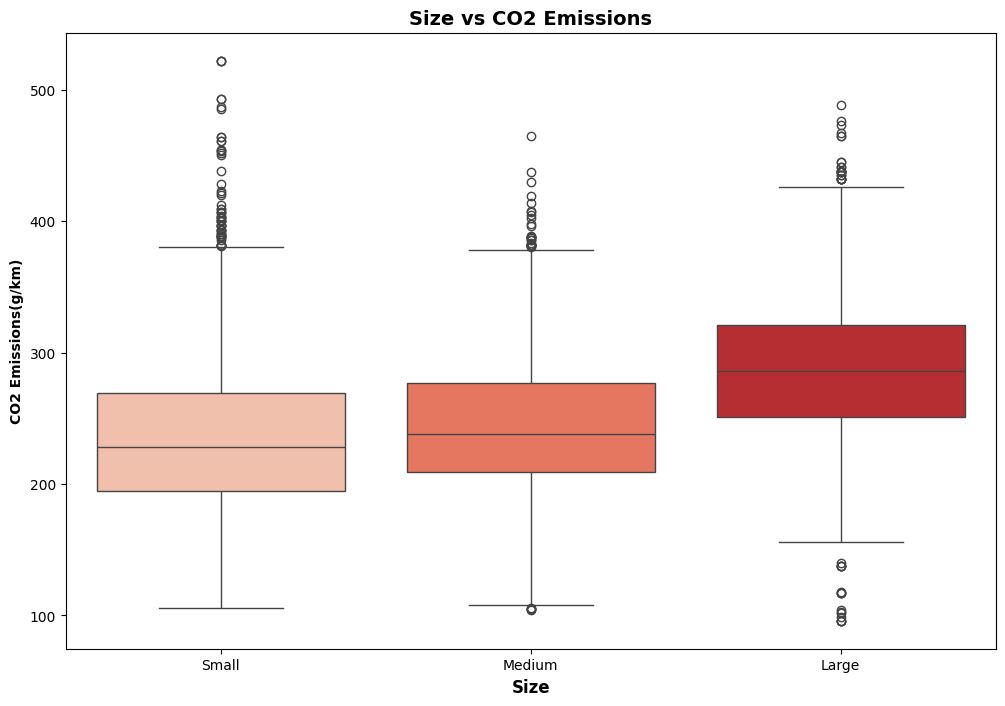

In [139]:
co2_emissions('Size')


Text(0.5, 1.0, 'Engine Size vs. CO2 Emissions')

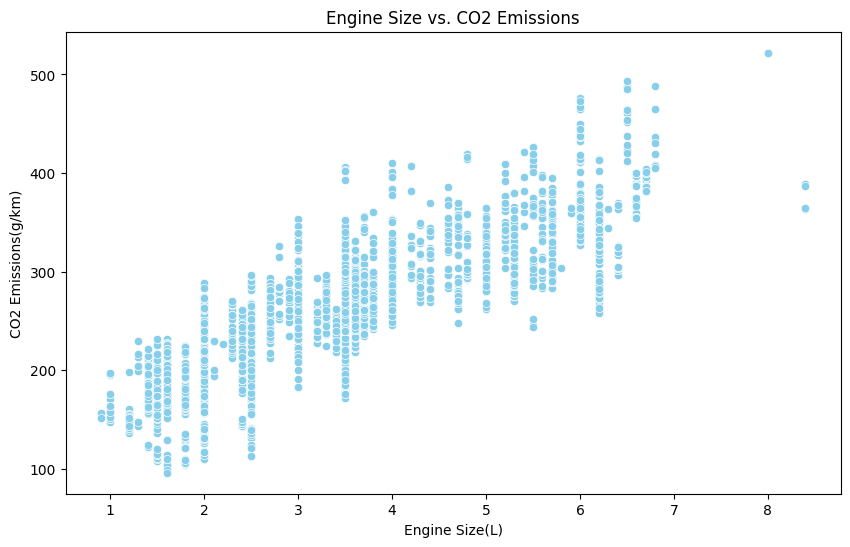

In [98]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=df,x='Engine Size(L)', y='CO2 Emissions(g/km)', color="skyblue")
plt.title('Engine Size vs. CO2 Emissions')

###How do features affect fuel consumption in the city and highway?

Let's take a look at fuel type, number of gears, vehicle class, and cylinders as potential features.

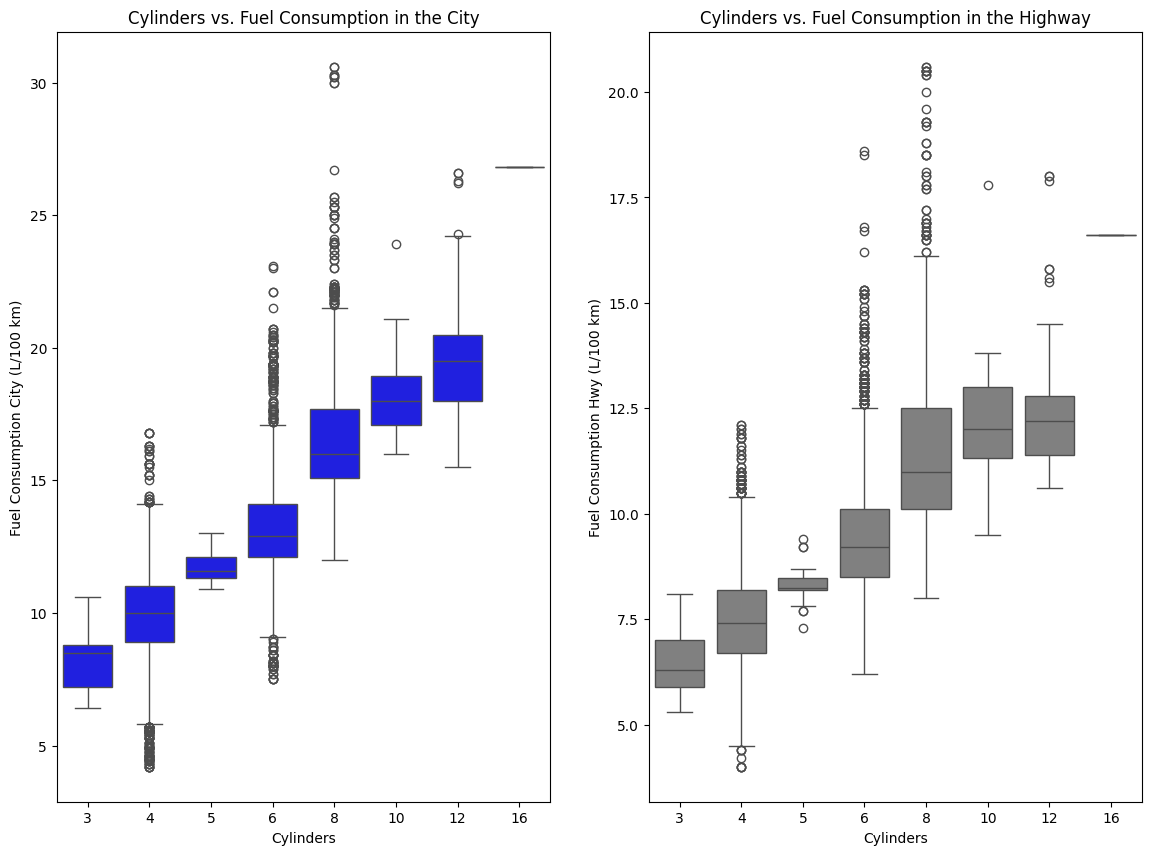

In [99]:
#create a function that creates two side by side boxplots one indicating fuel consumption in the city and one on the highway based on the feature

def fuel_consumption(feature):
  plt.figure(figsize=(14, 10))
  plt.subplot(1, 2, 1)
  ax1 = sns.boxplot(data=df, x=feature, y='Fuel Consumption City (L/100 km)', color = 'Blue')
  plt.title(f'{feature} vs. Fuel Consumption in the City')


  plt.subplot(1, 2, 2)
  ax2 = sns.boxplot(data=df, x=feature, y='Fuel Consumption Hwy (L/100 km)', color= 'Gray')
  plt.title(f'{feature} vs. Fuel Consumption in the Highway')

fuel_consumption('Cylinders')


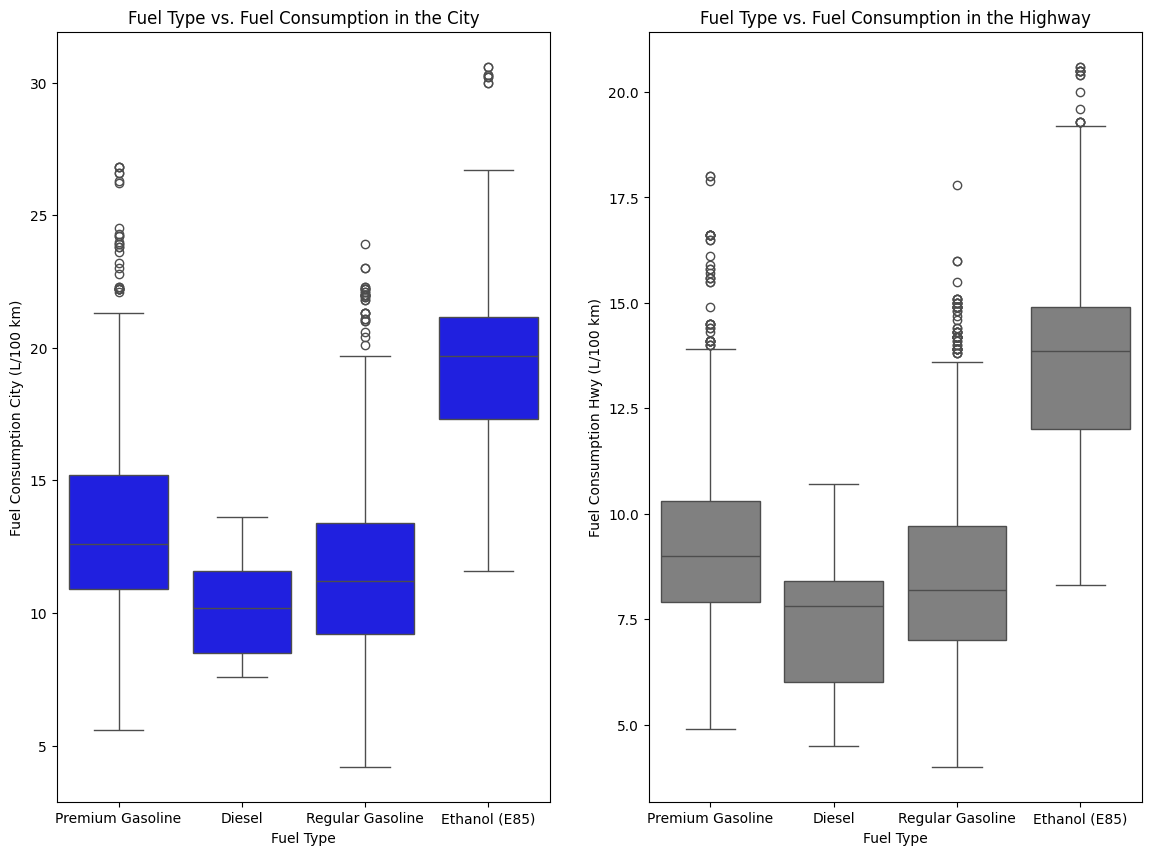

In [100]:
fuel_consumption('Fuel Type')

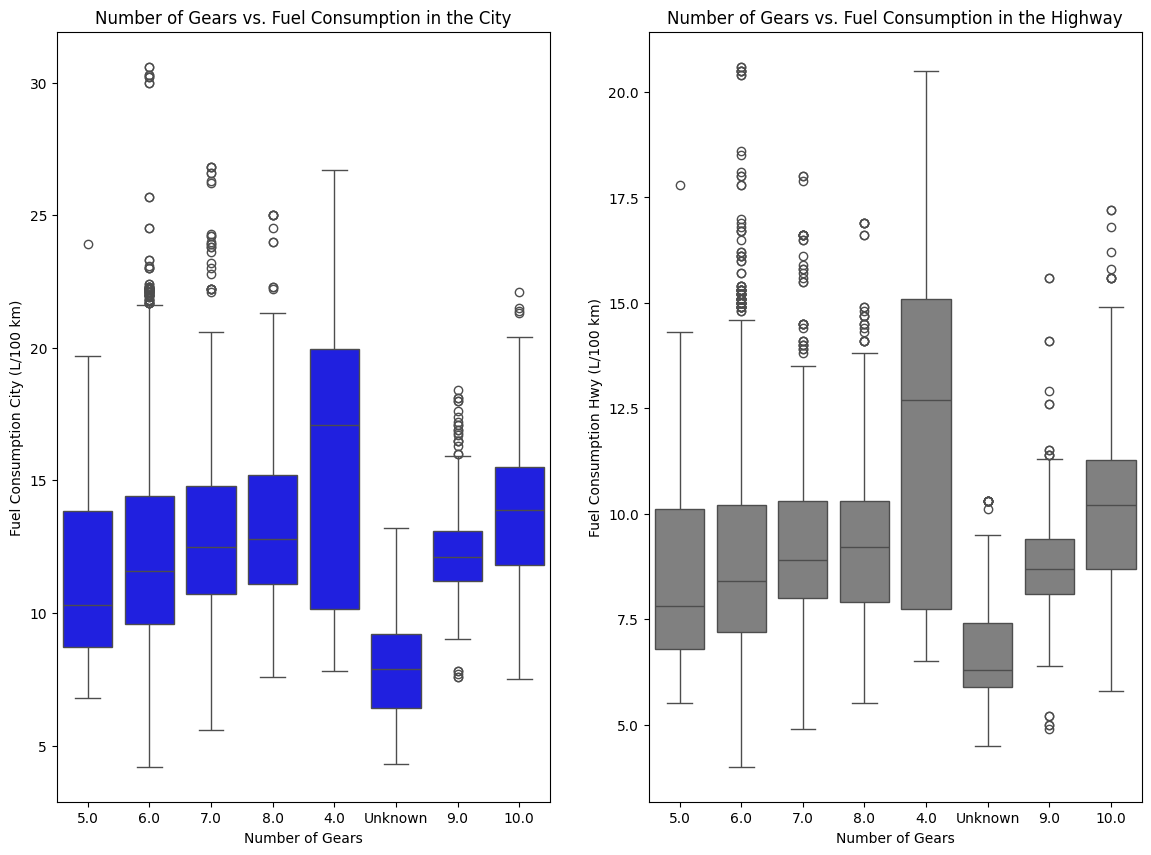

In [101]:
fuel_consumption('Number of Gears')

###How do the CO2 emissions compare between city and highway fuel consumption?

<Axes: xlabel='Fuel Consumption Hwy (L/100 km)', ylabel='CO2 Emissions(g/km)'>

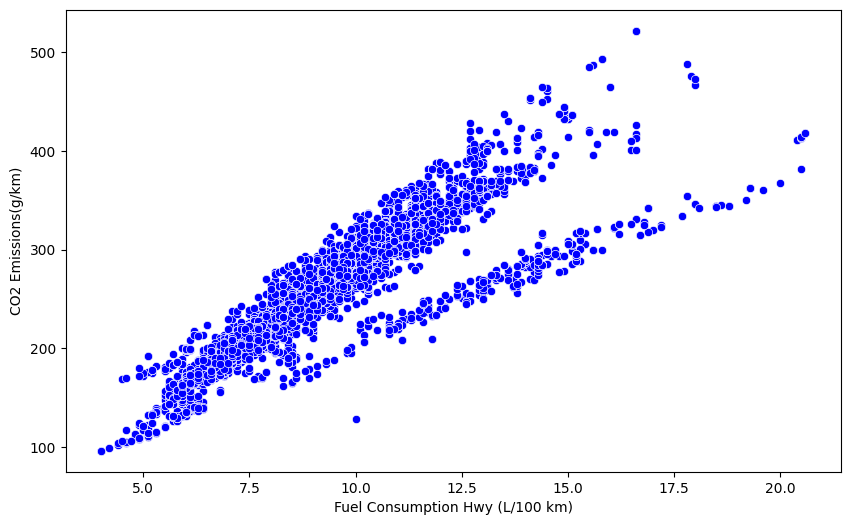

In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Fuel Consumption Hwy (L/100 km)', y='CO2 Emissions(g/km)', color='Blue')

<Axes: xlabel='Fuel Consumption City (L/100 km)', ylabel='CO2 Emissions(g/km)'>

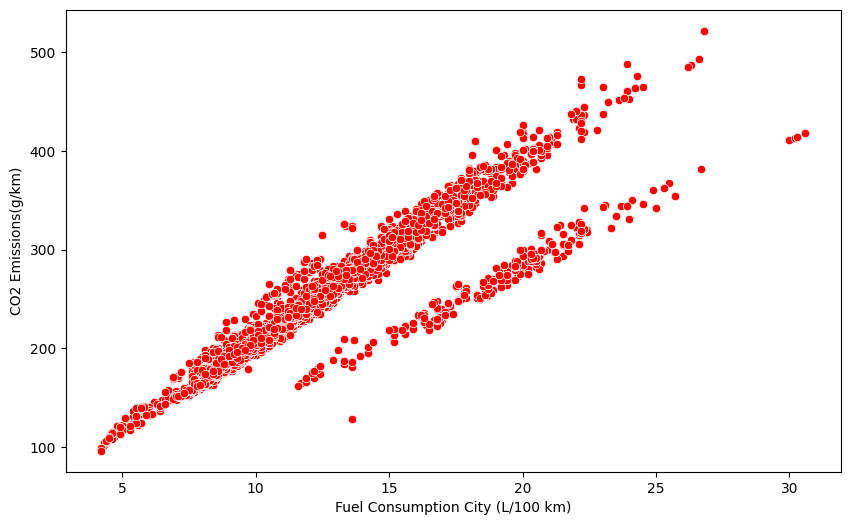

In [103]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Fuel Consumption City (L/100 km)', y='CO2 Emissions(g/km)', color='Red')

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

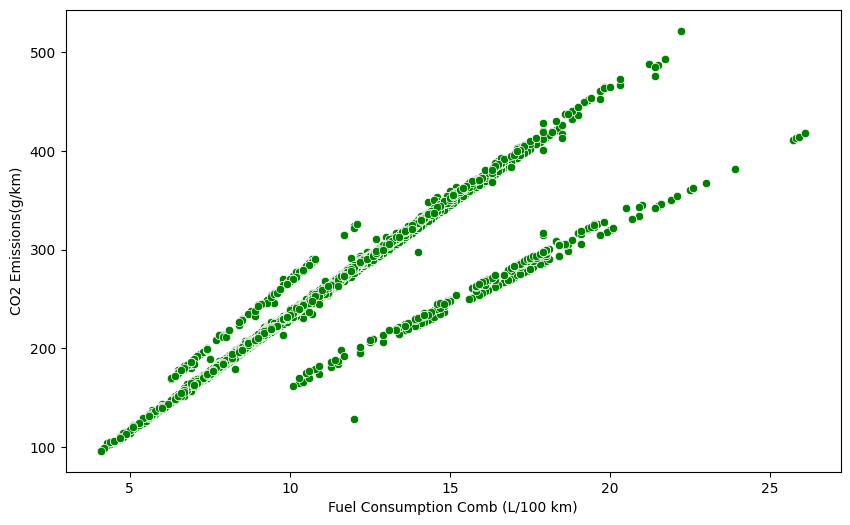

In [104]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', color='Green')

### Any correlations between numerical features?

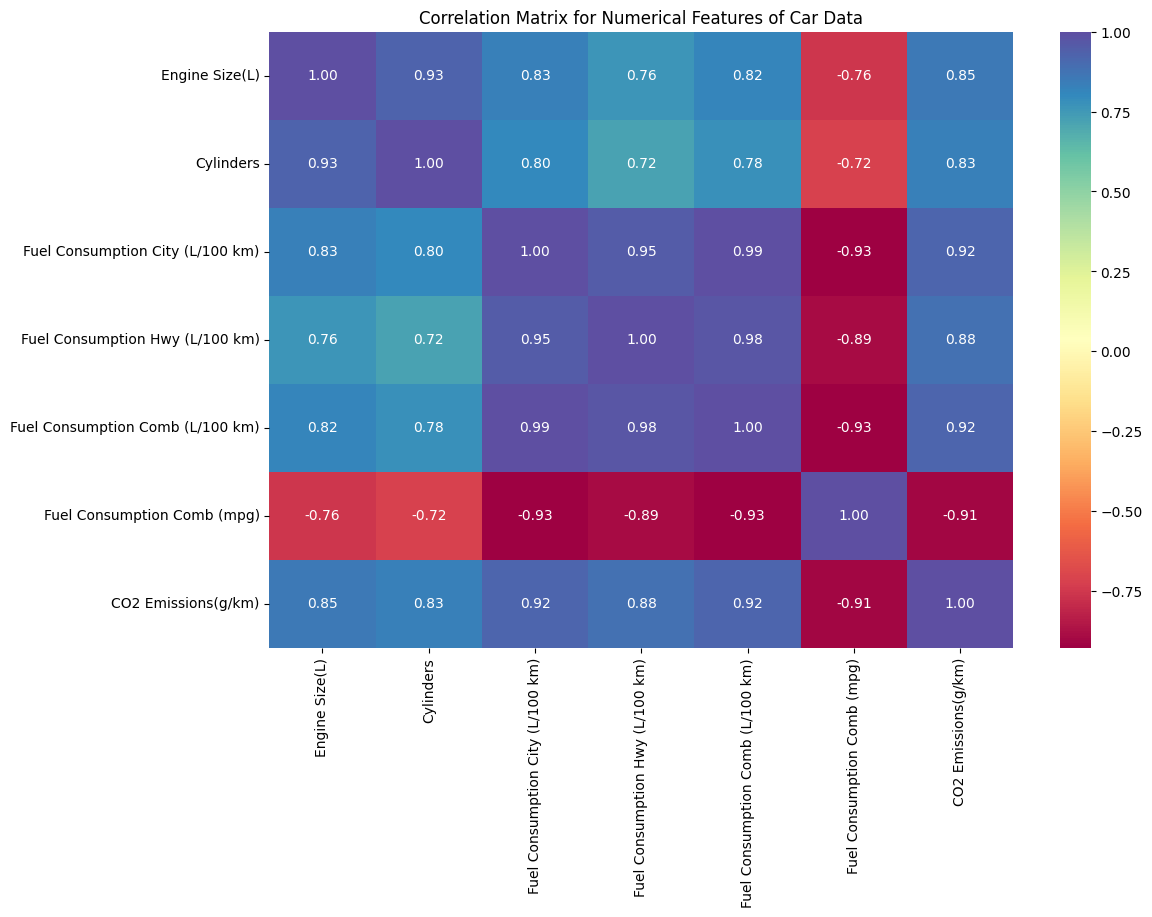

In [105]:
#create correlation matrix of dataset

num_df = df.select_dtypes(include=[np.number])

matrix = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, cmap='Spectral', fmt='.2f')
plt.title('Correlation Matrix for Numerical Features of Car Data')
plt.show()

It seems like engine size and cylinders are both strongly correlated with fuel consumption in the city and on the highway as well as with CO2 emissions.

###What are the distributions of CO2 emissions for each fuel type?



In [106]:
#create dataframes for each fuel type

PREMIUM_GASOLINE = df[df['Fuel Type'] == 'Premium Gasoline']
DIESEL = df[df['Fuel Type'] == 'Diesel']
REGULAR_GASOLINE = df[df['Fuel Type'] == 'Regular Gasoline']
ETHANOL = df[df['Fuel Type'] == 'Ethanol (E85)']

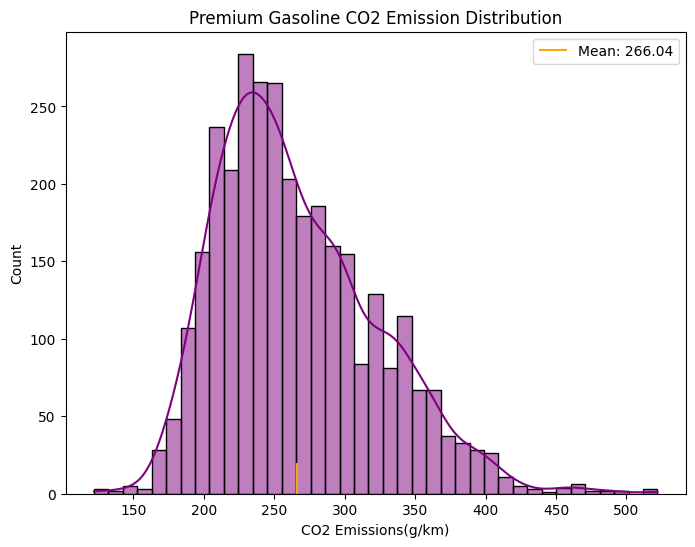

In [107]:
#functionalize each distributionplot_co2_distribution(DIESEL, 'Fuel Type', 'CO2 Emissions(g/km)', 'Diesel')

def plot_co2_distribution(df, fuel_type_column, co2_column, fuel_type_value):

    df_filtered = df[df[fuel_type_column] == fuel_type_value]
    co2_mean = df_filtered[co2_column].mean()

    plt.figure(figsize=(8, 6))

    sns.histplot(x=co2_column, data=df_filtered, kde=True, color='Purple')

    plt.title(f'{fuel_type_value} CO2 Emission Distribution')

    plt.vlines(co2_mean, ymin=0, ymax=20, color='orange', label=f'Mean: {co2_mean:.2f}')

    plt.legend()
    plt.show()

plot_co2_distribution(PREMIUM_GASOLINE, 'Fuel Type', 'CO2 Emissions(g/km)', 'Premium Gasoline')

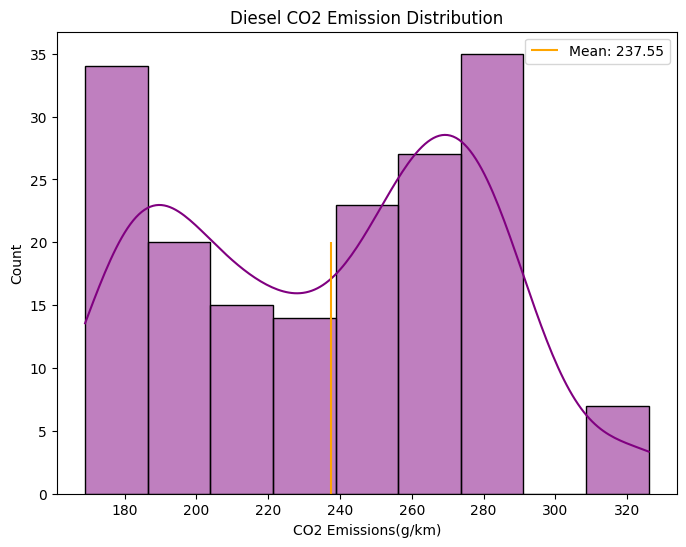

In [108]:
plot_co2_distribution(DIESEL, 'Fuel Type', 'CO2 Emissions(g/km)', 'Diesel')

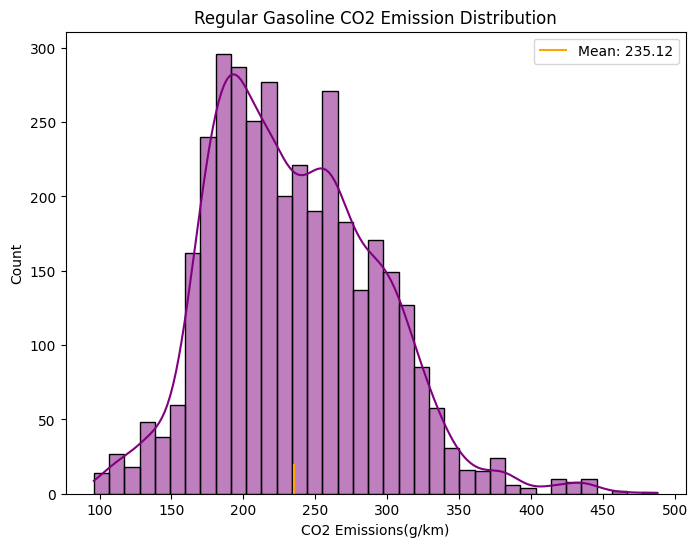

In [109]:
plot_co2_distribution(REGULAR_GASOLINE, 'Fuel Type', 'CO2 Emissions(g/km)', 'Regular Gasoline')

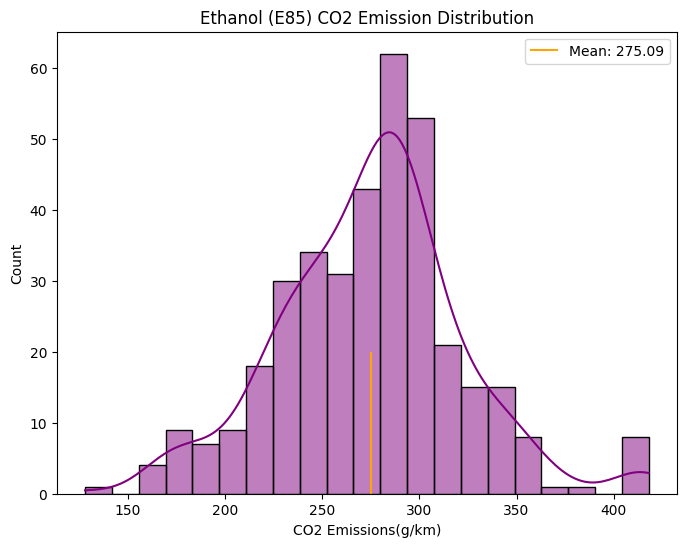

In [110]:
plot_co2_distribution(ETHANOL, 'Fuel Type', 'CO2 Emissions(g/km)', 'Ethanol (E85)')

###What are the distributions of CO2 emissions for the three vehicle sizes?

In [111]:
SMALL = df[df['Size'] == 'Small']
MEDIUM = df[df['Size'] == 'Medium']
LARGE = df[df['Size'] == 'Large']

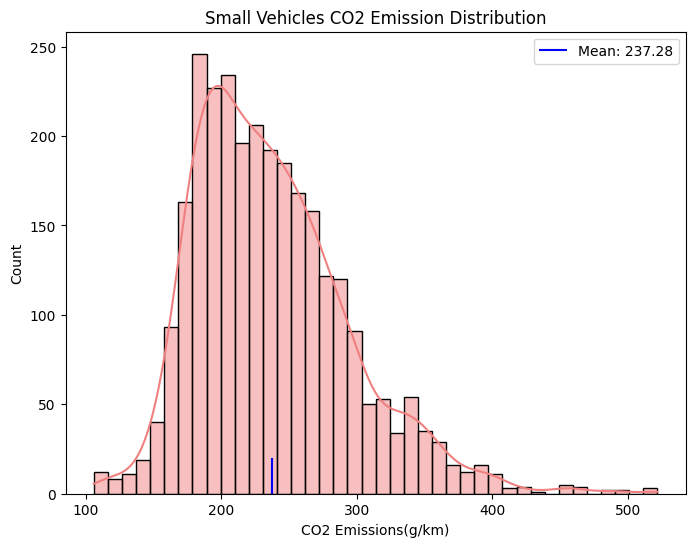

In [130]:
def plot_co2_distribution_size(df, size_column, co2_column, size):

    df_filtered = df[df[size_column] == size]
    co2_mean = df_filtered[co2_column].mean()

    plt.figure(figsize=(8, 6))

    sns.histplot(x=co2_column, data=df_filtered, kde=True, color='lightcoral')

    plt.title(f'{size} Vehicles CO2 Emission Distribution')

    plt.vlines(co2_mean, ymin=0, ymax=20, color='blue', label=f'Mean: {co2_mean:.2f}')

    plt.legend()
    plt.show()

plot_co2_distribution_size(SMALL, 'Size', 'CO2 Emissions(g/km)', 'Small')

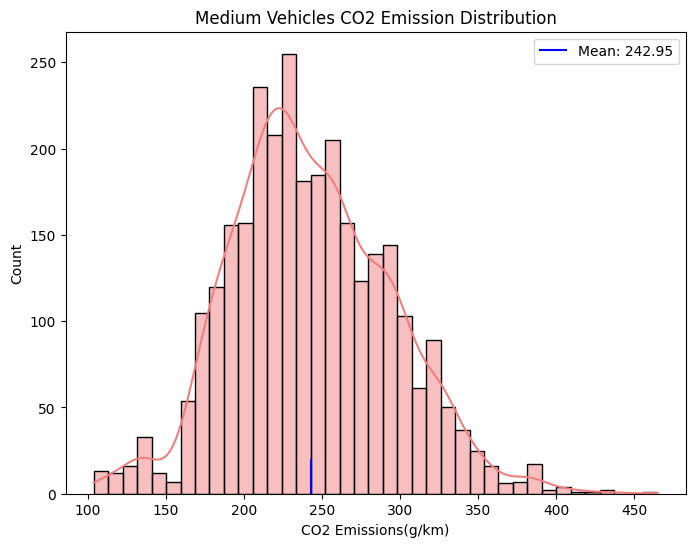

In [131]:
plot_co2_distribution_size(MEDIUM, 'Size', 'CO2 Emissions(g/km)', 'Medium')

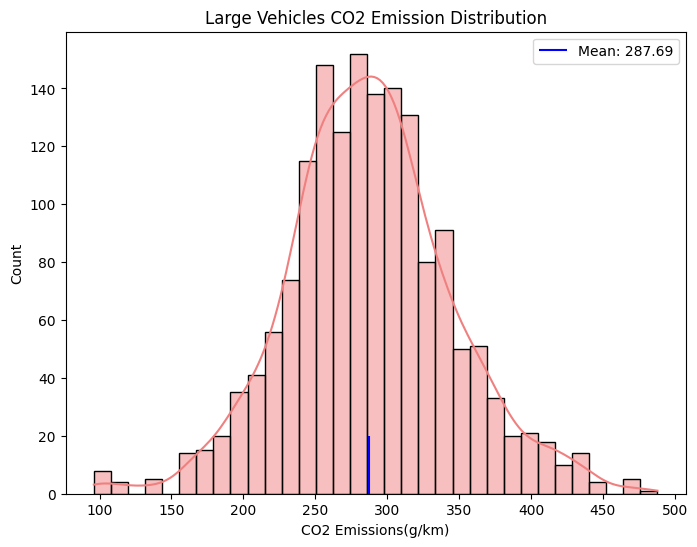

In [132]:
plot_co2_distribution_size(LARGE, 'Size', 'CO2 Emissions(g/km)', 'Large')

#Inferential Analyses

##Is there a statistical difference in CO2 Emission between the different fuel types?

###Step #0: Get a feel for the direction we're going in:

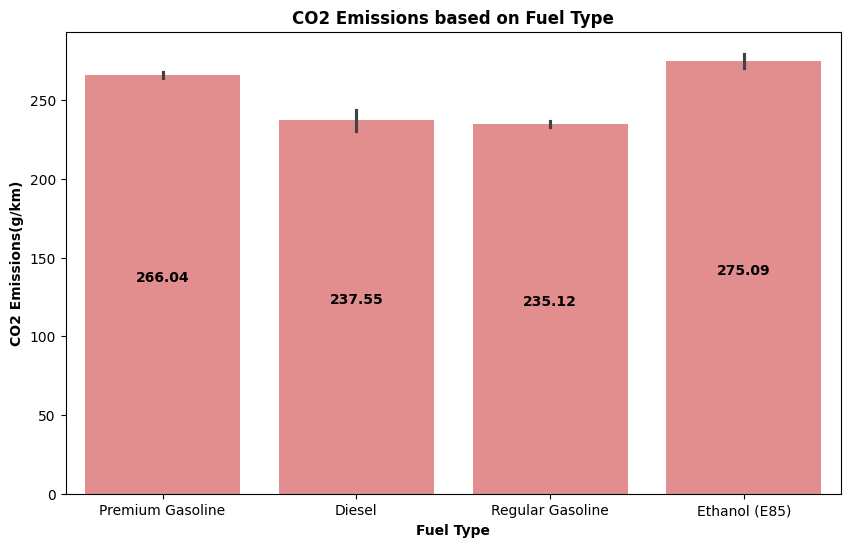

In [135]:
plt.figure(figsize=(10,6))

ax=sns.barplot(data=df, y='CO2 Emissions(g/km)', x='Fuel Type', color='lightcoral')
plt.title('CO2 Emissions based on Fuel Type', fontweight = 'bold')
plt.xlabel('Fuel Type', fontweight='bold')
plt.ylabel('CO2 Emissions(g/km)', fontweight='bold')

for p in ax.patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2
    ax.text(x_position, height/2, f'{height:.2f}', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

###Step #1: State the Hypothesis.

Null Hypothesis: There is no significant statistical difference in CO2 emissions between the fuel types.

Alternative Hypothesis: Different fuel types exhibit different levels of CO2 emissions.

###Step #1.5: Test for Normality

We can not simply assume that the distributions are normal, so we need to run a statistical test to identify that. The statistical test we will be using is called the Shapiro-Wilk Test.

In [116]:
from scipy.stats import shapiro

stat, p_value = shapiro(PREMIUM_GASOLINE['CO2 Emissions(g/km)'])

print(f"Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}")

print('stat=%.3f, p=%.3f' % (stat, p_value))
if p_value > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Shapiro-Wilk Test: Statistics=0.9619801266235906, p-value=3.203569672481698e-28
stat=0.962, p=0.000
Probably not Gaussian


Looks like the data is not normally distributed.

###Step #2: Identify the Test Statistic and its Probability Distribution.

Large enough sample

N = 7,384

Large enough subsamples:

Regular Gasoline = 3637, Premium Gasoline = 3202, Ethanol = 370, Diesel = 175

We do not know population parameters. Additionally, Shapiro-Wilk test revealed the samples are most likely not normally distributed, ruling out parametric hypothesis tests.

With all aspects considered, Kruskal-Wallis H-Test is the most fitting hypothesis test.

###Step #3: Specify the Significance Level.

In [117]:
alpha = 0.05

###Step #4: State the Decision Rule.

In [118]:
def interpret_hypothesis_test(p_value, alpha):
    if p_value < alpha:
        print("Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.")
        print("\t –> `θ ≠ θ₀`")
        print("\nEvidence has been found to suggest that there is a statistical difference in CO2 emissions between different fuel types.")
    else:
        print("Testing has concluded in a FAILURE TO REJECT THE NULL HYPOTHESIS.")
        print("\t –> `θ = θ₀`")
        print("\nNo evidence has been found at this time to suggest that there is a statistical difference in CO2 emissions between different fuel types.")

###Step #5: Collect Data and Calculate the Test Statistic.

In [119]:
#import appropriate scipy.stats test suite
from scipy import stats


fuel_types = df['Fuel Type'].unique()

groups = [df[df['Fuel Type'] == fuel_type]['CO2 Emissions(g/km)'] for fuel_type in fuel_types]

kruskal_stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {kruskal_stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H-statistic: 561.0202973912928
P-value: 2.8391720331786946e-121


###Step #6: Make the Statistical Decision.

In [120]:
interpret_hypothesis_test(p_value=p_value, alpha=alpha)

Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.
	 –> `θ ≠ θ₀`

Evidence has been found to suggest that there is a statistical difference in CO2 emissions between different fuel types.


##Is there a statistical difference in CO2 Emission based on different sized vehicles?

###Step #0: Get a feel for the direction we're going in:

<ipython-input-121-3b4961e1bbb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, y='CO2 Emissions(g/km)', x='Size', palette= 'GnBu')


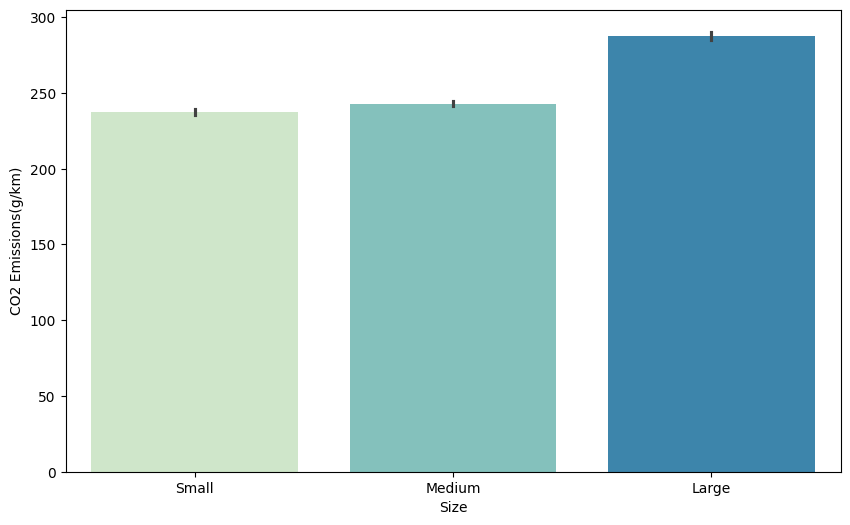

In [121]:
plt.figure(figsize=(10,6))

sns.barplot(data=df, y='CO2 Emissions(g/km)', x='Size', palette= 'GnBu')

plt.show()

###Step #1: State the Hypothesis.

Null Hypothesis: There is no significant statistical difference in CO2 emissions between three vehicle sizes.

Alternative Hypothesis: Different vehicle sizes exhibit different levels of CO2 emissions.

###Step #1.5: Test for Normality

We can not simply assume that the distributions are normal, so we need to run a statistical test to identify that. The statistical test we will be using is called the Shapiro-Wilk Test.

In [122]:
from scipy.stats import shapiro

stat, p_value = shapiro(SMALL['CO2 Emissions(g/km)'])

print(f"Shapiro-Wilk Test: Statistics={stat}, p-value={p_value}")

print('stat=%.3f, p=%.3f' % (stat, p_value))
if p_value > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Shapiro-Wilk Test: Statistics=0.9515894043827146, p-value=1.337209957417988e-29
stat=0.952, p=0.000
Probably not Gaussian


###Step #2: Identify the Test Statistic and its Probability Distribution.

Large enough sample:

N = 7,384

Large enough subsamples:

Small = 2825, Medium = 2940, Large = 1619

We do not know population parameters. Additionally, Shapiro-Wilk test revealed the samples are most likely not normally distributed, ruling out parametric hypothesis tests.

With all aspects considered, Kruskal-Wallis H-Test is the most fitting hypothesis test.

###Step #3: Specify the Significance Level.

In [123]:
alpha = 0.05

###Step #4: State the Decision Rule.

In [124]:
def interpret_hypothesis_test(p_value, alpha):
    if p_value < alpha:
        print("Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.")
        print("\t –> `θ ≠ θ₀`")
        print("\nEvidence has been found to suggest that there is a statistical difference in CO2 emissions between different vehicle sizes.")
    else:
        print("Testing has concluded in a FAILURE TO REJECT THE NULL HYPOTHESIS.")
        print("\t –> `θ = θ₀`")
        print("\nNo evidence has been found at this time to suggest that there is a statistical difference in CO2 emissions between different vehicle sizes.")

###Step #5: Collect Data and Calculate the Test Statistic.

In [125]:
#import appropriate scipy.stats test suite
from scipy import stats


sizes = df['Size'].unique()

groups = [df[df['Size'] == size]['CO2 Emissions(g/km)'] for size in sizes]

kruskal_stat, p_value = stats.kruskal(*groups)

print(f"Kruskal-Wallis H-statistic: {kruskal_stat}")
print(f"P-value: {p_value}")

Kruskal-Wallis H-statistic: 906.4879115203495
P-value: 1.4409571202748198e-197


###Step #6: Make the Statistical Decision.

In [126]:
interpret_hypothesis_test(p_value=p_value, alpha=alpha)

Testing has concluded in a SUCCESSFUL REJECTION OF THE NULL HYPOTHESIS.
	 –> `θ ≠ θ₀`

Evidence has been found to suggest that there is a statistical difference in CO2 emissions between different vehicle sizes.


#Summary of Findings

After completing descriptive and inferential analyses accompanied with meticulously curated visuals, here are some of the important findings worth summarizing.

The aim of this investigation and our business use case is a car manufacturer asking us to identify the vehicle specifications that affect CO2 emissions. Recently, regulatory bodies have announced a reduction in acceptable CO2 emissions among new vehicles, thus the need for our analysis.

Data visualizations show a positive correlation between the number of cylinders and CO2 emissions. Naturally, size of the vehicle also impacts its CO2 emissions. Vehicles that utilize ethanol as fuel tend to have higher fuel consumption both in city and highway settings. Diesel actually showed lowest fuel consumption of the four fuel types both in the city and on the highway. Regular gasoline seems to be the fuel type that would generally have lower CO2 emissions.

Evidence showed that there was a statistical difference in CO2 emissions between the four fuel types. Inferential analysis was done on this where the null and alternative hypothesis were:

Null Hypothesis: There is no significant statistical difference in CO2 emissions between the fuel types.

Alternative Hypothesis: Different fuel types exhibit different levels of CO2 emissions.

We used a Kruskal-Wallis H-Test to identify that there was indeed a statistical difference in CO2 emissions based on different fuel types.

We also suspected based on descriptive analyses that there may be statistical difference in CO2 emissions between different vehicle sizes. A hypothesis test was conducted using the following null and alternative hypothesis:

Null Hypothesis: There is no significant statistical difference in CO2 emissions between three vehicle sizes.

Alternative Hypothesis: Different vehicle sizes exhibit different levels of CO2 emissions.

Also utilizing a Kruskal-Wallis H-Test, we identified there was statistical evidence that there is a difference in CO2 emissions between the three vehicle sizes.

The descriptive and inferential analyses seem to suggest the following features as key impacters of CO2 emissions: vehicle size, fuel type, cylinders, engine size, fuel consumption in the city and on the highway. It may also be worth mentioning that HONDA manages to maintain one of the lowest average CO2 emissions out of all makes. There may be value in diving deeper into how they manage to do that.

I would like to mention that these are recommendations based off of relatively general data, graphical trends, and hypothesis testing. There was sufficient analyses completed to make these recommendations, although there is always room for more detailed and concrete evidence driven analyses, whether that is through better understanding of the data or diving deeper into more advanced statistics and calculations. This is just the overview to a much more detailed and advanced set of recommendations that can be explored further in the future.

#Appendix

Dataset:

https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Vehicle size information:

https://afdc.energy.gov/data/10380

Hypothesis Testing Tool:

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/